# Dataset : Hospital No-show Analysis

## Step 0: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1: Questions

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## Step 2: Wrangle Data

In [2]:
df = pd.read_csv('data.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### No data is missing in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


### Removing irrelevant values for Age

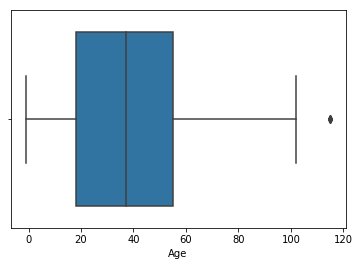

In [5]:
sns.boxplot(df['Age'])

In [6]:
df = df[ (df['Age'] <=100) & (df['Age']>0)]

## Step 3: EDA

### Defining one function that calculates the probability of No-show given a group by on a particular column

In [7]:
def findProb(groupby ,  df, return_dict=False):
    
    groupby.append('No-show')
    lst = []
    lst_key= {}
    df_temp = df.groupby(groupby).count()
    #print(df_temp)
    for i in range(0,len(df_temp),2):
        #print(df_temp['PatientId'][i+1] , df_temp['PatientId'][i])
        #print(df_temp.index[i][0])
        lst.append(df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1]))
        lst_key[df_temp.index[i][0]] = df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1])
        #i = i+2
    if(return_dict):
        return lst_key
    return lst

In [8]:
df_count = df['No-show'].value_counts()
df_count

No     85303
Yes    21677
Name: No-show, dtype: int64

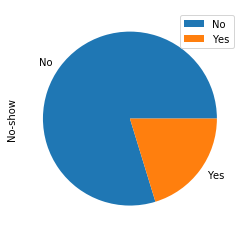

In [9]:
df_count.plot(kind='pie', legend=True, figsize=(4,4))

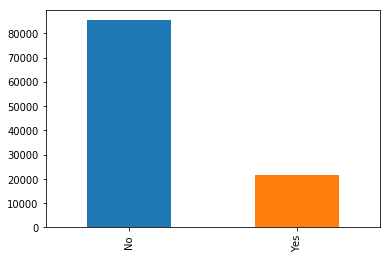

In [10]:
df_count.plot(kind='bar')

### Analysis based on Gender

In [11]:
count_gender = findProb(['Gender'],df, True)

### Women see doctor more often than men

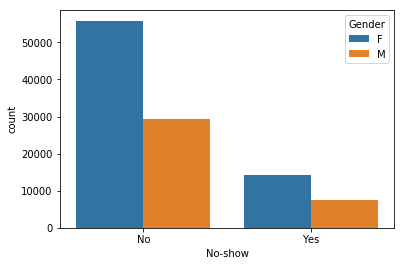

In [12]:
sns.countplot(df['No-show'], hue=df['Gender'])

### 20 % of the people don't show up on Appointments on Average be it a Male or a Female

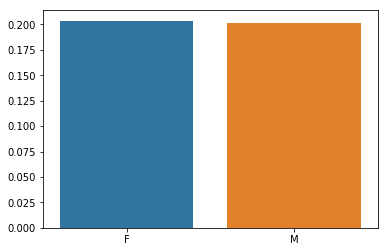

In [13]:
sns.barplot(x= np.array(list(count_gender.keys())), y = np.array(list(count_gender.values())))

### Conclusion: Not related to gender any ways

### Analysis based on the day of the week Appointment was scheduled

In [14]:
weekday = []
for i in enumerate(df.ScheduledDay):
    weekday.append(i[1].weekday())

In [15]:
df["Scheduled_Weekday"] = weekday

### Most of the appointments are scheduled on Tuesday

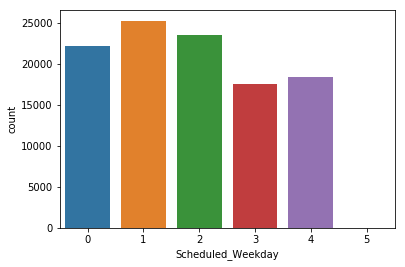

In [16]:
sns.countplot( df['Scheduled_Weekday'])

In [17]:
count = findProb(['Scheduled_Weekday'] ,df, True)

### Most of the appointments scheduled on Friday have a less probability of cancelling

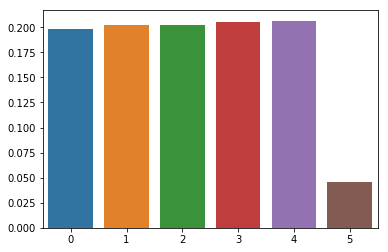

In [18]:
sns.barplot(x= np.array(list(count.keys())), y = np.array(list(count.values())))

### Conclusion: It does not really matters on which day the appointment was booked, Friday comes out to be a day where there is low chance of No-show but we do not have enough data for friday to support this claim

### Analysis based on the day of the week Actual Appointment was scheduled

In [19]:
weekday_a = []
for i in enumerate(df.AppointmentDay):
    weekday_a.append(i[1].weekday())

In [20]:
df['Appointment_Weekday'] = weekday_a

### Most of the appointments are scheduled on Tuesday, Wednesday

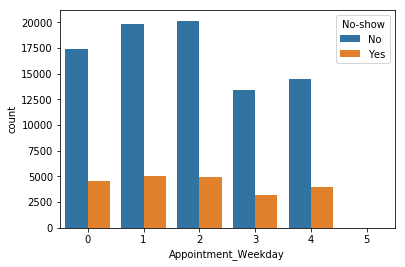

In [21]:
sns.countplot( df['Appointment_Weekday'], hue=df['No-show'])

In [22]:
count_week = findProb(['Appointment_Weekday'], df, True)
count_week

{0: 0.20610931007716543,
 1: 0.20233588401127667,
 2: 0.1972100438421682,
 3: 0.1946445725264169,
 4: 0.21338821490467938,
 5: 0.23076923076923078}

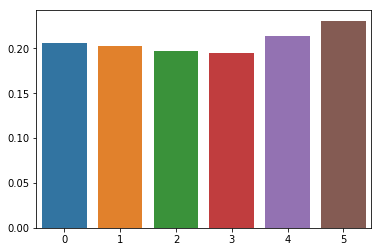

In [23]:
sns.barplot(x = np.array(list(count_week.keys())) , y=np.array(list(count_week.values())) )

### Looks like friday is the day when people miss most appointments but we do not have enough data to support this claim

### Analysis based on the age

In [24]:
count_age = findProb(['Age'], df, True)

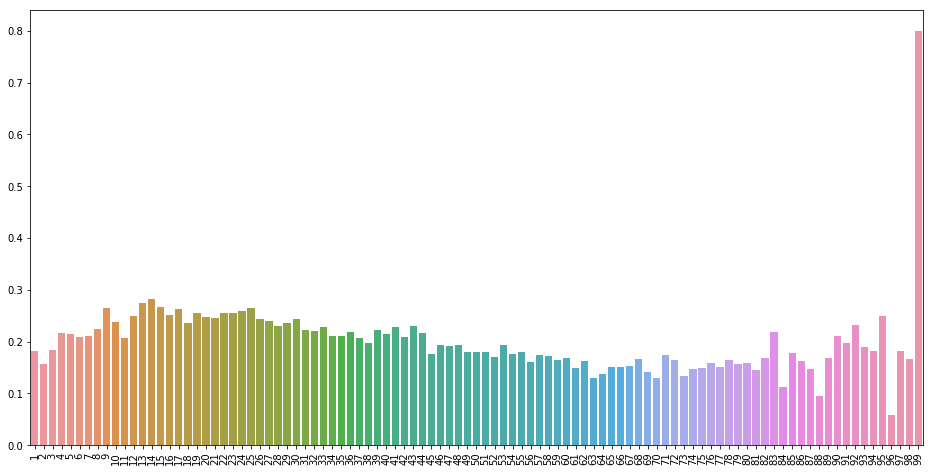

In [25]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(x = np.array(list(count_age.keys())) , y=np.array(list(count_age.values())));
plt.xticks(rotation=90);

### Conclusion: People close to 99 are more vulnerable to miss an appointment. Also in the age group of 13-15 they are more likely to miss an appointment

### Analysis based on the Neighbourhood

In [26]:
count_hood = findProb(['Neighbourhood'], df, True)

In [27]:
count_hood;

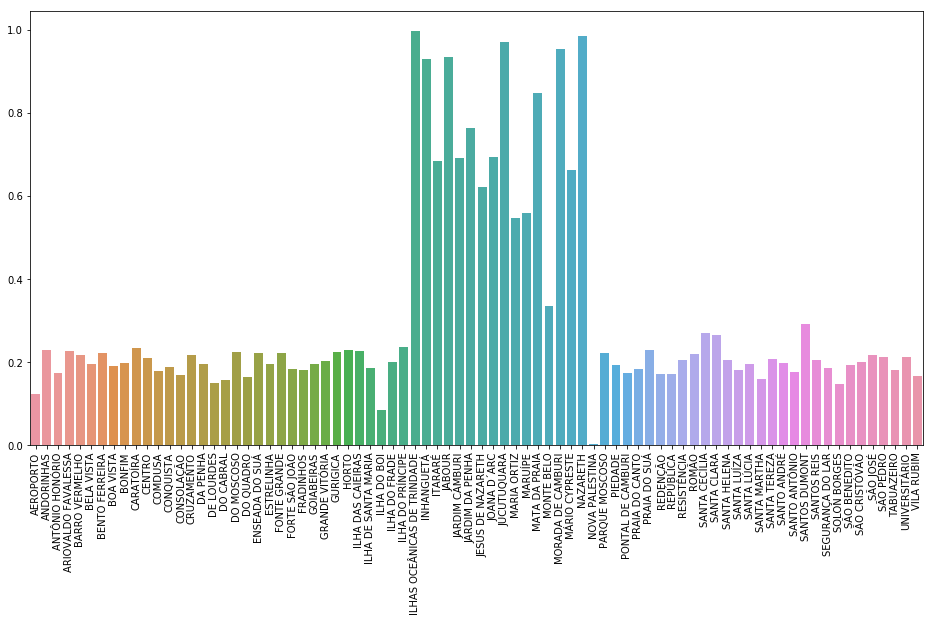

In [28]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(x = np.array(list(count_hood.keys())) , y=np.array(list(count_hood.values())));
plt.xticks(rotation=90);

### Conclusion People having Appointment in ILHAS OCEÂNICAS DE TRINDADE,
### INHANGUETÁ': 0.9311111111111111, 'JABOUR': 0.9344063164287884,
### 'JARDIM DA PENHA': 0.7651685393258427,'JESUS DE NAZARETH': 0.6227678571428571,
### 'JOANA D´ARC': 0.6940581542351454,'JUCUTUQUARA': 0.9706666666666667 
### have greater chances of no show.


### Clearly the Neighbourhood matters a lot

### Analysis based on Scholarship

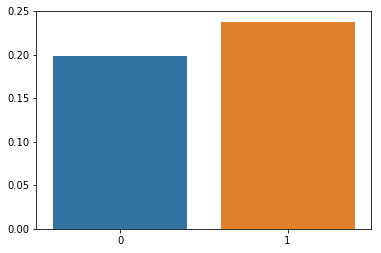

In [29]:
count_scholar = findProb(['Scholarship'], df, True)


sns.barplot(x = np.array(list(count_scholar.keys())) , y=np.array(list(count_scholar.values())))


### Not much of a difference, people who do not have a scholarship are more likely to not miss an appointment

### Analysis based on Various Diseases


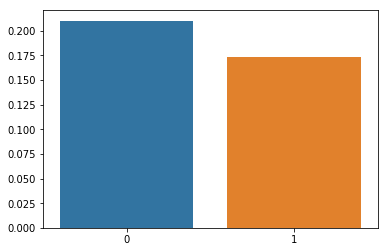

In [30]:
count_hyper = findProb(['Hipertension'], df, True)


sns.barplot(x = np.array(list(count_hyper.keys())) , y=np.array(list(count_hyper.values())))


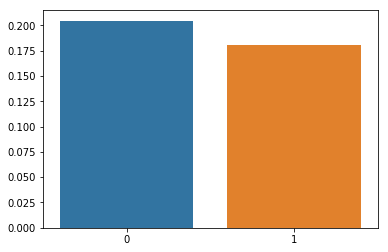

In [31]:
count_dia = findProb(['Diabetes'], df, True)


sns.barplot(x = np.array(list(count_dia.keys())) , y=np.array(list(count_dia.values())))


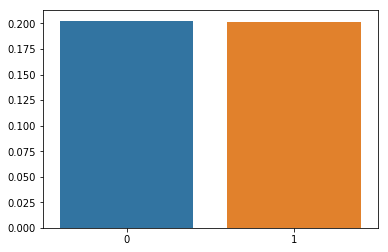

In [32]:
count_alcohal = findProb(['Alcoholism'], df, True)


sns.barplot(x = np.array(list(count_alcohal.keys())) , y=np.array(list(count_alcohal.values())))


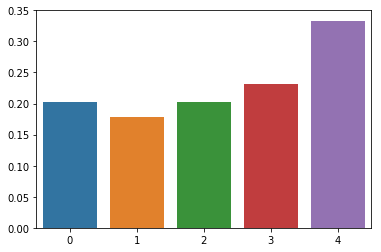

In [33]:
count_handi = findProb(['Handcap'], df, True)


sns.barplot(x = np.array(list(count_handi.keys())) , y=np.array(list(count_handi.values())))

### Conclusion: It does not matters for what a person is showing up to doctor but if a person is handicapped in level 4 then there is a 34% probability that he won't show up

### Analysis based on the SMS

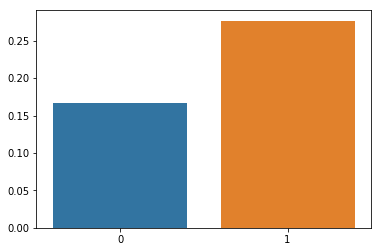

In [34]:
count_sms = findProb(['SMS_received'], df, True)


sns.barplot(x = np.array(list(count_sms.keys())) , y=np.array(list(count_sms.values())))

### Conclusion: It is so interesting to see that people who did not receive the SMS are less likely to miss an appointment as compared to people who received SMS. There is a probabilty that 28% of the people who received an SMS will not show up. Interesting, I was not expecting this

### Finding Correlation between various Variables

In [35]:
modified_df = df
modified_df['No-show'] = modified_df['No-show'].map({'Yes':1,'No':0})
modified_df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Weekday,Appointment_Weekday
PatientId,1.000000,0.004193,-0.003060,-0.002162,-0.006195,0.001882,0.011367,-0.007888,-0.008495,-0.001037,-0.001762,-0.001380
AppointmentID,0.004193,1.000000,-0.023450,0.022384,0.012086,0.022509,0.033162,0.014000,-0.254696,-0.161565,-0.006973,-0.051602
Age,-0.003060,-0.023450,1.000000,-0.112668,0.502307,0.290793,0.090461,0.073400,0.005332,-0.067183,0.007592,0.000526
Scholarship,-0.002162,0.022384,-0.112668,1.000000,-0.024534,-0.027629,0.033523,-0.009824,-0.000019,0.029384,-0.005592,-0.000778
Hipertension,-0.006195,0.012086,0.502307,-0.024534,1.000000,0.430836,0.085459,0.078377,-0.008851,-0.037253,-0.000702,0.002683
Diabetes,0.001882,0.022509,0.290793,-0.027629,0.430836,1.000000,0.016870,0.056477,-0.016143,-0.015919,-0.001164,0.006281
Alcoholism,0.011367,0.033162,0.090461,0.033523,0.085459,0.016870,1.000000,0.003897,-0.027409,-0.000510,0.006252,0.002460
Handcap,-0.007888,0.014000,0.073400,-0.009824,0.078377,0.056477,0.003897,1.000000,-0.025018,-0.006699,0.000375,0.004260
SMS_received,-0.008495,-0.254696,0.005332,-0.000019,-0.008851,-0.016143,-0.027409,-0.025018,1.000000,0.127300,0.078584,-0.092653
No-show,-0.001037,-0.161565,-0.067183,0.029384,-0.037253,-0.015919,-0.000510,-0.006699,0.127300,1.000000,0.006100,0.002076


### Removing ID variables as they not contribute at all in deciding whether a patient will turn up or not

In [36]:
modified_df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)

In [37]:
modified_df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Weekday,Appointment_Weekday
Age,1.000000,-0.112668,0.502307,0.290793,0.090461,0.073400,0.005332,-0.067183,0.007592,0.000526
Scholarship,-0.112668,1.000000,-0.024534,-0.027629,0.033523,-0.009824,-0.000019,0.029384,-0.005592,-0.000778
Hipertension,0.502307,-0.024534,1.000000,0.430836,0.085459,0.078377,-0.008851,-0.037253,-0.000702,0.002683
Diabetes,0.290793,-0.027629,0.430836,1.000000,0.016870,0.056477,-0.016143,-0.015919,-0.001164,0.006281
Alcoholism,0.090461,0.033523,0.085459,0.016870,1.000000,0.003897,-0.027409,-0.000510,0.006252,0.002460
Handcap,0.073400,-0.009824,0.078377,0.056477,0.003897,1.000000,-0.025018,-0.006699,0.000375,0.004260
SMS_received,0.005332,-0.000019,-0.008851,-0.016143,-0.027409,-0.025018,1.000000,0.127300,0.078584,-0.092653
No-show,-0.067183,0.029384,-0.037253,-0.015919,-0.000510,-0.006699,0.127300,1.000000,0.006100,0.002076
Scheduled_Weekday,0.007592,-0.005592,-0.000702,-0.001164,0.006252,0.000375,0.078584,0.006100,1.000000,0.324949
Appointment_Weekday,0.000526,-0.000778,0.002683,0.006281,0.002460,0.004260,-0.092653,0.002076,0.324949,1.000000


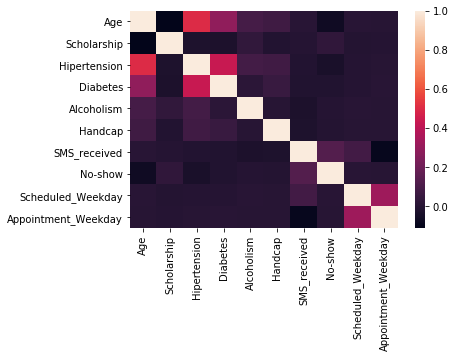

In [38]:
sns.heatmap(modified_df.corr())

### Conclusion: It turns out that Hypertension and Diabetes are closely related to each other

### Also Hypertension and Age have a positive correlation which means that as the person gets old, he has 50 %chance of getting Hypertension

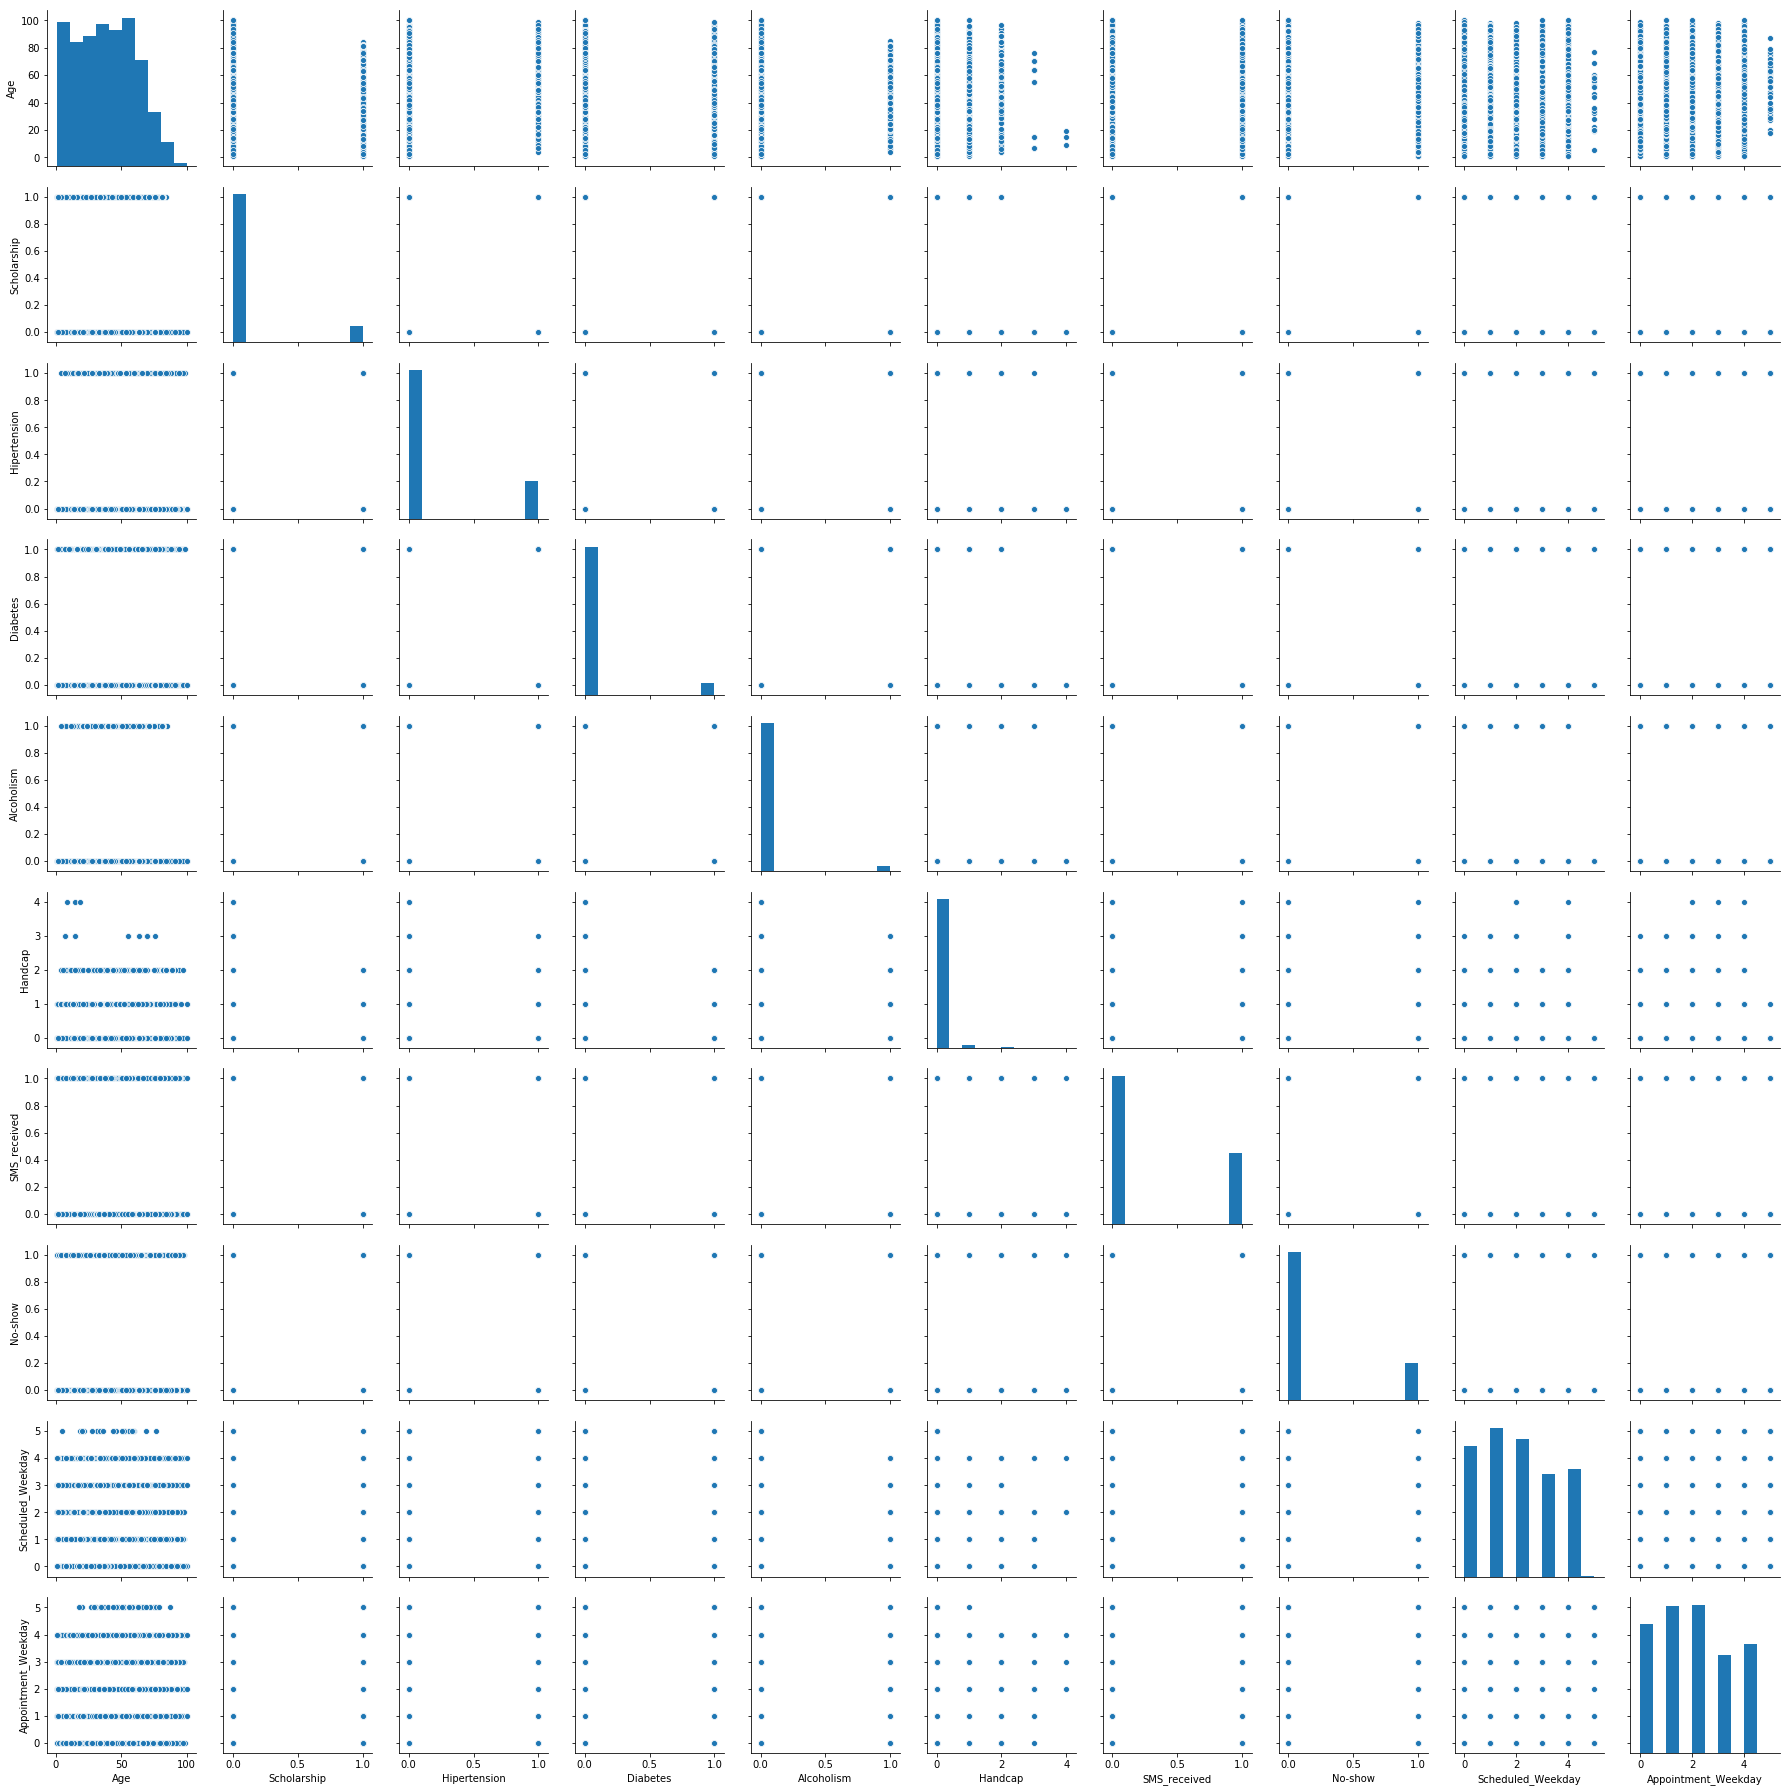

In [39]:
sns.pairplot(modified_df)